# MTH9879 Homework 10

Assigned: April 19, 2016.
Due: May 3, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

# Biya Wu

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

(a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.


#### Answer

- when $i \neq j$, wlog we assume $i > j$, then $G_{ij}= \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt = \int_{t_{i-1}}^{t_i} \, (\frac{1}{t_{j-1}-(t+1)} - \frac{1}{t_{j}-(t+1)}) \, dt = \ln(\frac{(t_i-t_j+1)(t_{i-1}-t_{j-1}+1)}{(t_i-t_{j-1}+1)(t_{i-1}-t_j+1)})$
- when $i = j$, $G_{ii}= \int_{t_{i-1}}^{t_i}\,\int_{t_{i-1}}^{t_i}\,G(|t-s|)\,ds\,dt = 2 \int_{t_{i-1}}^{t_i}\,dt\,\int_{t_{i-1}}^{t}\,G(t-s)\,ds = 2\int_{t_{i-1}}^{t_i}(1-\frac{1}{1+t-t_{i-1}})\,dt = 2(t_i-t_{i-1})-2\ln(1+t_i-t_{i-1})$




(b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.

(c) Plot your results - you should end up with something like Figure 2 of Lecture 10.



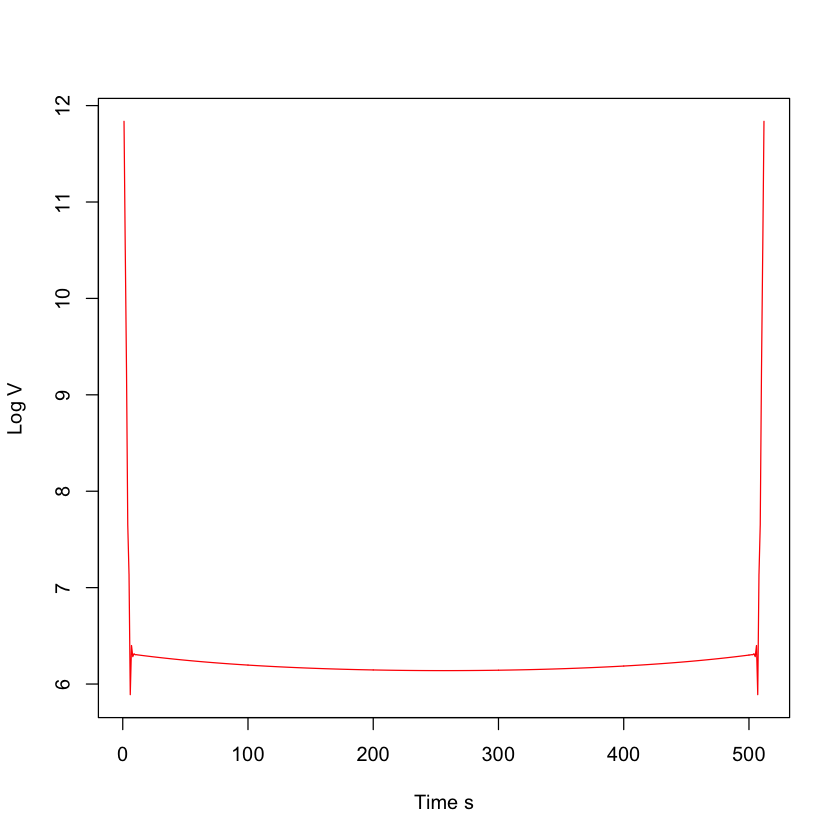

In [30]:
N <- 512
dt <- 1/N
a<-matrix(nrow=N,ncol = N)
for (i in 1:N)
    for (j in 1:N)
        {
            if (i!=j)
                a[i,j]=log((1+abs(i-j)*dt)^2 / ((1+(abs(i-j)-1)*dt)*(1+(abs(i-j)+1)*dt)))
            else
                a[i,j]=2*dt - 2*log(1 + dt)
        }
x = solve(a) %*% matrix(1, nrow = N,ncol = 1)
plot(log(abs(x)),type='l', col = "red", xlab = "Time s", ylab = "Log V")

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

#### Answer

$C_{ii} = \frac{4}{3}\,x_i\,h(v_i)\,\sqrt{t_i-t_{i-1}}= x_i \sigma \sqrt{\frac{\dot x_i}{V}(t_i-t_{i-1})}$<br\>
$C_{ji} = \frac{4}{3}\,x_j\,h(v_i) \frac{\left(t_{j}-t_{i-1}\right)^{3/2}  -\left(t_{j}-t_{i}\right)^{3/2}
-\left(t_{j-1}-t_{i-1}\right)^{3/2} +\left(t_{j-1}-t_{i}\right)^{3/2}}{t_{j}-t_{j-1}} 
= x_j \sigma \sqrt{\frac{\dot x_i}{V}} \frac{\left(t_{j}-t_{i-1}\right)^{3/2}  -\left(t_{j}-t_{i}\right)^{3/2}
-\left(t_{j-1}-t_{i-1}\right)^{3/2} +\left(t_{j-1}-t_{i}\right)^{3/2}}{t_{j}-t_{j-1}} $ <br\>

$C_{11} = x_1 \sigma \sqrt{\frac{x_1}{V t_1}t_1} =  x_1 \sigma \sqrt{\frac{x_1}{V}} 
\quad C_{22} = x_2 \sigma \sqrt{\frac{x_2}{V }}  
\quad C_{33} = x_3 \sigma \sqrt{\frac{x_3}{V}} = (X-x_1-x_2) \sigma \sqrt{\frac{X-x_1-x_2}{V}}$<br\>

$C_{21}=x_2 \sigma \sqrt{\frac{x_1}{V t_1}} \, \frac{t_2^\frac 3 2 - (t_2-t_1)^\frac 3 2 -t_1^\frac 3 2}{t_2-t_1} 
\quad C_{31} = (X-x_1-x_2) \sigma \sqrt{\frac{x_1}{V t_1}} \, \frac{T^\frac 3 2 - (T-t_1)^\frac 3 2 -t_2^\frac 3 2+(t_2-t_1)^\frac 3 2 }{T-t_2} 
\quad C_{32} = (X-x_1-x_2) \sigma \sqrt{\frac{x_2}{V (t_2-t_1)}}\, \frac{(T-t_1)^\frac 3 2 - (T-t_2)^\frac 3 2 -(t_2-t_1)^\frac 3 2 }{T-t_2} 
$

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.


In [31]:
X<- 1
T<- 1
sigma <- 1
V<-1
t1 <- T/3
t2 <- T*2/3
C_total <- function(x)
{
    x1 <- x[1]
    x2 <- x[2]
    C11 <- x1*sigma*sqrt(x1/V)
    C22 <- x2*sigma*sqrt(x2/V)
    C33 <- (X-x1-x2)*sqrt((X-x1-x2)/V)
    C21 <- x2*sigma*sqrt(x1/V/t1)*(t2^1.5-(t2-t1)^1.5-t1^1.5)/(t2-t1)
    C31 <- (X-x1-x2)*sigma*sqrt(x1/V/t1)*(T^1.5-(T-t1)^1.5-t2^1.5+(t2-t1)^1.5)/(T-t2)
    C32 <- (X-x1-x2)*sigma*sqrt(x2/V/(t2-t1))*((T-t1)^1.5-(T-t2)^1.5-(t2-t1)^1.5)/(T-t2)
    return (C11+C22+C33+C21+C31+C32)
}
options(warn=-1)
res <- optim(c(.3,0.3), C_total)
cat('x1 and x2 are', res$par,' of X \n')
cat('minimum cost is ', res$value,'*X*sigma*sqrt(X/V)')

x1 and x2 are 0.6458326 5.816656e-17  of X 
minimum cost is  0.8832832 *X*sigma*sqrt(X/V)


(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?



#### Answer

1-0.8832 = 0.1168

(d) Explain to your non-mathematical manager why this strategy has lower expected cost.

#### Answer

If market impact of meta orders is all temporary, and ours is the only metaorder trading, then these savings should be achievable because we can trade more on the end when the impact has blowed over.
